# <span style="color:darkblue"> Lecture 9 Exercises </span>

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [32]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for two currencies:

- 1 dollar (USD) to chinese yuan (RMB)
- 1 dollar (USD) to japanese yen (JPY).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "exchangerates.csv"
- Parse the "date_string" column with ```pd.to_datetime()```



In [33]:
# Write your own code

exchangerates = pd.read_csv("data_raw/exchangerates.csv")
exchangerates['date_string'] = pd.to_datetime(exchangerates['date_string'])
exchangerates['date_string']

0       1981-01-02
1       1981-01-05
2       1981-01-06
3       1981-01-07
4       1981-01-08
           ...    
11016   2023-03-27
11017   2023-03-28
11018   2023-03-29
11019   2023-03-30
11020   2023-03-31
Name: date_string, Length: 11021, dtype: datetime64[ns]

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "usd_to_rmb" and "usd_to_jpy" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 USD to RMB" and "1 USD to JPY"



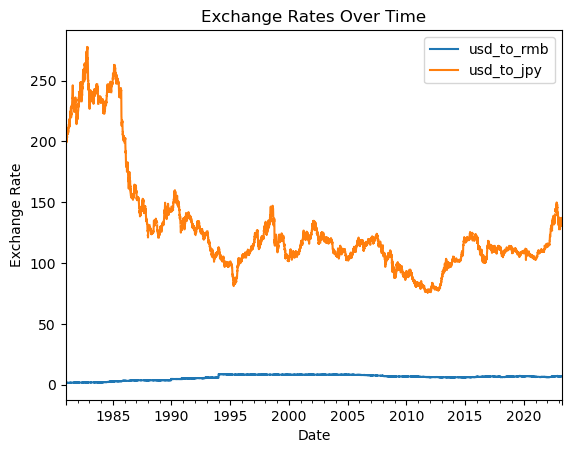

In [34]:
# Write your own code

# Plotting
exchangerates[['date_string','usd_to_rmb','usd_to_jpy']].set_index('date_string').plot()

# Lable legend, and Title
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates Over Time')
plt.legend()

plt.show()



<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_rmb" which computes the percentage daily <br>
growth rate of "usd_to_rmb".



In [35]:
# Write your own code
exchangerates['diff_rmb']= exchangerates['usd_to_rmb']-exchangerates['usd_to_rmb'].shift(1)
exchangerates['growth_rmb']= (exchangerates['diff_rmb']/(exchangerates['usd_to_rmb'].shift(1)))*100

exchangerates



,date_string,usd_to_rmb,usd_to_jpy,diff_rmb,growth_rmb
0,1981-01-02,1.5341,202.50,NaN,NaN
1,1981-01-05,1.5418,199.05,0.0077,0.501923
2,1981-01-06,1.5264,199.70,-0.0154,-0.998833
3,1981-01-07,1.5264,201.05,0.0000,0.000000
4,1981-01-08,1.5264,201.70,0.0000,0.000000
...,...,...,...,...,...
11016,2023-03-27,6.8834,131.49,0.0159,0.231525
11017,2023-03-28,6.8725,130.97,-0.0109,-0.158352
11018,2023-03-29,6.8862,132.69,0.0137,0.199345
11019,2023-03-30,6.8700,132.71,-0.0162,-0.235253


<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_rmb" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_rmb" series, label the axes and the title
- Use the command ```plt.fill_between()``` to create a shaded region <br>
for time periods where "bool_cond" is true.



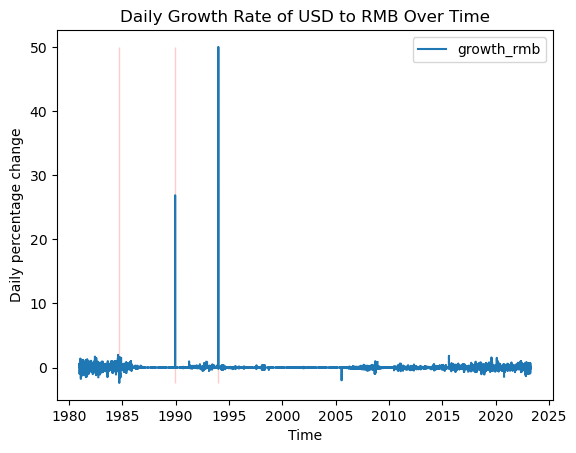

In [40]:
# Write your own code

# Define boolean colum
exchangerates['bool_cond'] = (exchangerates['growth_rmb'] > 2) | (exchangerates['growth_rmb'] < -2)

# Generate a line plot
plt.plot("date_string", "growth_rmb", data = exchangerates)

# Add a shaded region
vec_y = exchangerates['growth_rmb']
plt.fill_between(x=exchangerates['date_string'],
                 y1=vec_y.min(),
                 y2=vec_y.max(),
                 where=exchangerates['bool_cond'],
                 alpha=0.2, color="red")

plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Daily Growth Rate of USD to RMB Over Time")
plt.legend()
plt.show()

In [19]:
exchangerates

,date_string,usd_to_rmb,usd_to_jpy,diff_rmb,growth_rmb,bool_cond
0,1981-01-02,1.5341,202.50,NaN,NaN,False
1,1981-01-05,1.5418,199.05,0.0077,0.501923,False
2,1981-01-06,1.5264,199.70,-0.0154,-0.998833,False
3,1981-01-07,1.5264,201.05,0.0000,0.000000,False
4,1981-01-08,1.5264,201.70,0.0000,0.000000,False
...,...,...,...,...,...,...
11016,2023-03-27,6.8834,131.49,0.0159,0.231525,False
11017,2023-03-28,6.8725,130.97,-0.0109,-0.158352,False
11018,2023-03-29,6.8862,132.69,0.0137,0.199345,False
11019,2023-03-30,6.8700,132.71,-0.0162,-0.235253,False


<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the date column and freq to "m" (month)
- Compute an aggregate dataset <br>
by month which computes the standard deviation of "usd_to_rmb"
- Display the dataset




In [27]:
# Write your own code

# Set the key to the date columne by m
month_config = pd.Grouper(key='date_string', freq='M')

# Compute the aggregate dataset
monthly_std_dev = exchangerates.groupby(month_config)['usd_to_rmb'].std()

monthly_std_dev

date_string
1981-01-31    0.019149
1981-02-28    0.015432
1981-03-31    0.012636
1981-04-30    0.017154
1981-05-31    0.017583
                ...   
2022-11-30    0.077405
2022-12-31    0.028203
2023-01-31    0.052152
2023-02-28    0.067344
2023-03-31    0.034796
Freq: M, Name: usd_to_rmb, Length: 507, dtype: float64

<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["usd_to_rmb","usd_to_jpy"]
```

- Display the dataset


In [28]:
# Write your own code

long_format_data = exchangerates.melt(var_name='type', 
                         value_name='exchange_rate',
                         id_vars=['date_string'], 
                         value_vars=['usd_to_rmb', 'usd_to_jpy'])

long_format_data
                         





,date_string,type,exchange_rate
0,1981-01-02,usd_to_rmb,1.5341
1,1981-01-05,usd_to_rmb,1.5418
2,1981-01-06,usd_to_rmb,1.5264
3,1981-01-07,usd_to_rmb,1.5264
4,1981-01-08,usd_to_rmb,1.5264
...,...,...,...
22037,2023-03-27,usd_to_jpy,131.4900
22038,2023-03-28,usd_to_jpy,130.9700
22039,2023-03-29,usd_to_jpy,132.6900
22040,2023-03-30,usd_to_jpy,132.7100
